In [60]:
import PIL
import matplotlib.pyplot as plt
import numpy as np  

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image

from denoiser_utils import denoise
from calc_metrics import get_metrics

CONFIG_PATH = './configs/test/denoise.yaml'
paths = denoise(CONFIG_PATH)

Global seed set to 0


Checking configs/test/denoise.yaml...
Number of images in folders:  18 18 test/eta/*.png test/dark/*.png
Denoising configs/test/denoise.yaml...
Loading model from checkpoints\lpdm_lol.ckpt
Global Step: 5440
ConditionalDDPM: Running in eps-prediction mode
DiffusionWrapper has 95.87 M params.


100%|███████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 17992.72it/s]

File test/denoised/10001.png already exists, skipping...
File test/denoised/1771.png already exists, skipping...
File test/denoised/1773.png already exists, skipping...
File test/denoised/1783.png already exists, skipping...
File test/denoised/3628.png already exists, skipping...
File test/denoised/3633.png already exists, skipping...
File test/denoised/3639.png already exists, skipping...
File test/denoised/5278.png already exists, skipping...
File test/denoised/5285.png already exists, skipping...
File test/denoised/5289.png already exists, skipping...
File test/denoised/694.png already exists, skipping...
File test/denoised/701.png already exists, skipping...
File test/denoised/7199.png already exists, skipping...
File test/denoised/806.png already exists, skipping...
File test/denoised/979.png already exists, skipping...
File test/denoised/9988.png already exists, skipping...
File test/denoised/9990.png already exists, skipping...
File test/denoised/9991.png already exists, skippin

In [61]:
def display_images(path, x, y, w, h):
    fig, ax = plt.subplots(2, 3, figsize=(13, 8))
    ax = ax.flatten()
    
    image_paths = [path['cond_path'], path['pred_path'], path['save_path']]
    titles = ['raw', 'LIME', 'LIME + LPDM']
    for i, (image_path, title) in enumerate(zip(image_paths, titles)):
        image = Image.open(image_path)
        rect = Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
        ax[i].imshow(image)
        ax[i].add_patch(rect)
        ax[i].set_title(title)        

    # Magnifying the images
    for i, (image_path, title) in enumerate(zip(image_paths, titles)):
        image = Image.open(image_path)
        ax[i+3].imshow(image)
        ax[i+3].set_title(title)
        ax[i+3].set_xlim(x, x + w)
        ax[i+3].set_ylim(y + h, y)
    
    fig.tight_layout()
    # Displaying the images
    plt.show()

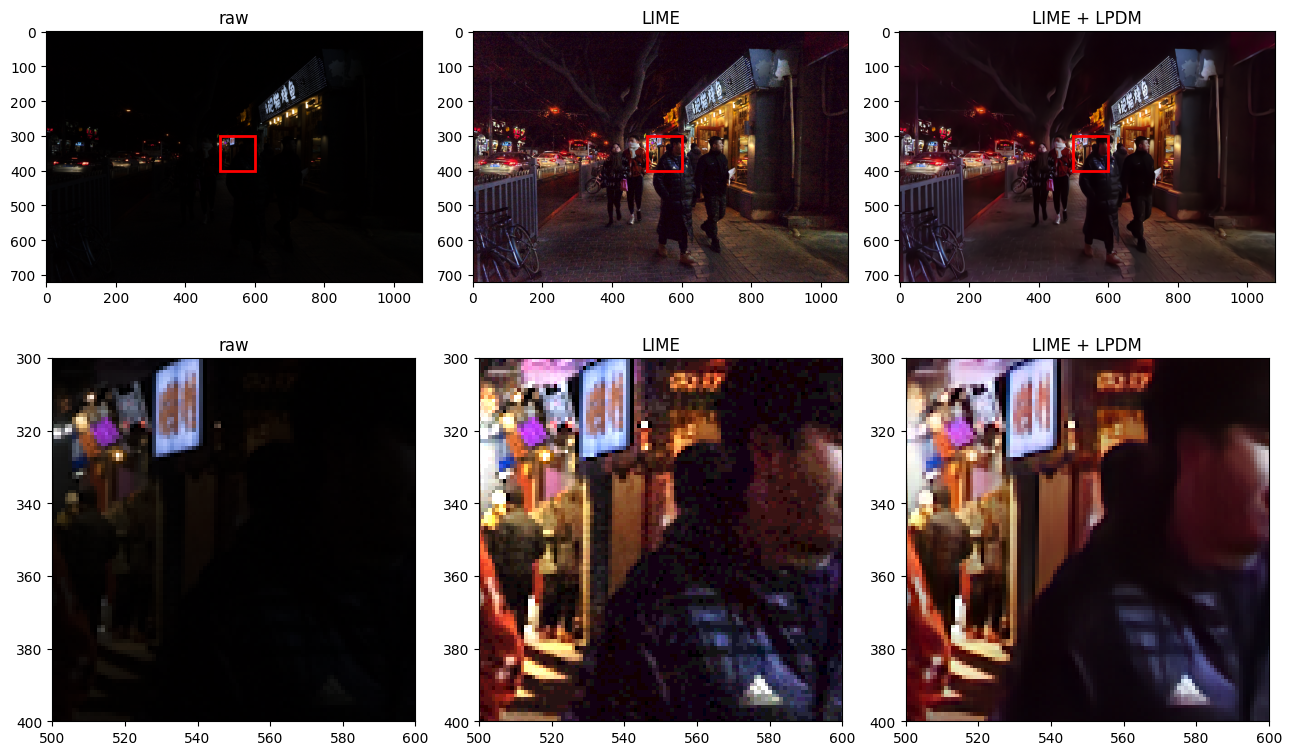

In [65]:
display_images(paths[0], 500, 300, 100, 100)

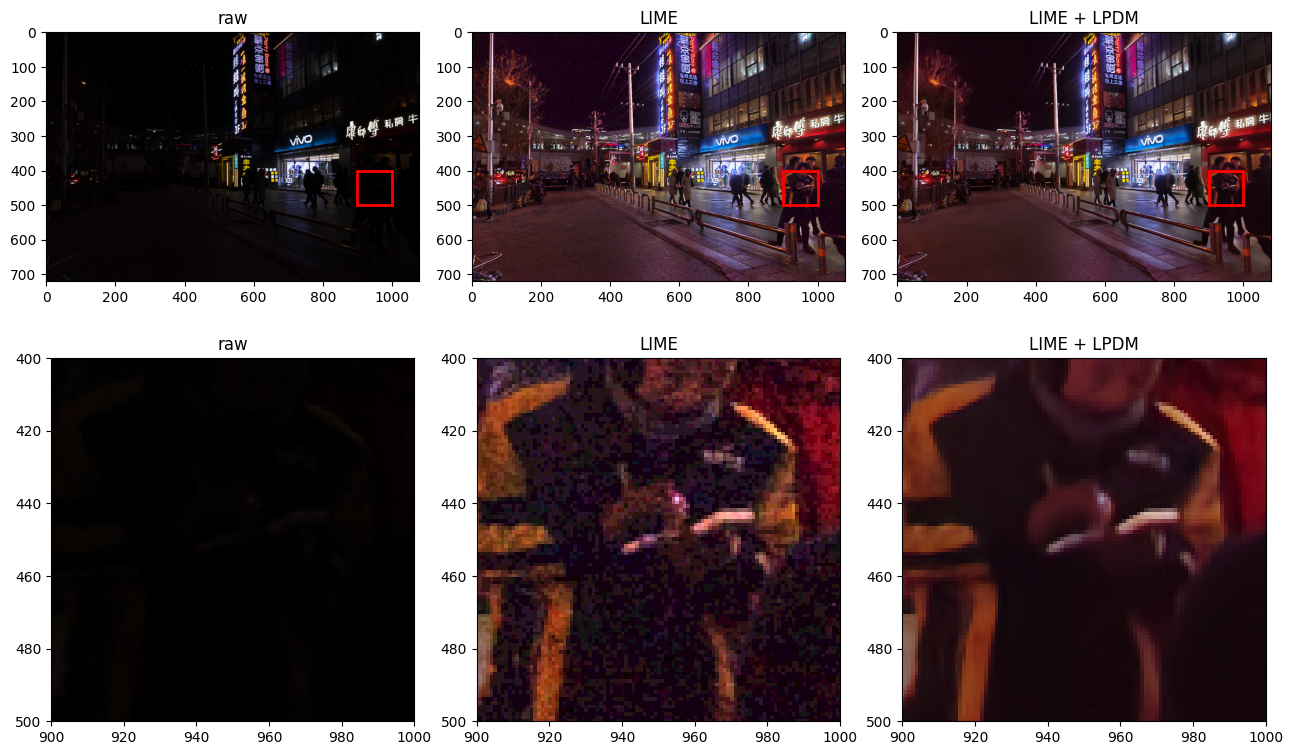

In [56]:
display_images(paths[1], 900, 400, 100, 100)

In [57]:
metrics_lpdm = get_metrics('test/dark/*.png', 'test/denoised/*.png')
metrics_lime = get_metrics('test/dark/*.png', 'test/eta/*.png')

Scanning configs...
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


D:\Programs\miniconda\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\Programs\miniconda\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: D:\Programs\miniconda\lib\site-packages\lpips\weights\v0.1\alex.pth
Loading pretrained model MUSIQ from C:\Users\Serhii\.cache\torch\hub\checkpoints\musiq_spaq_ckpt-358bb6af.pth
Calculating metrics: metrics.yaml


18it [00:08,  2.06it/s]


Scanning configs...
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: D:\Programs\miniconda\lib\site-packages\lpips\weights\v0.1\alex.pth
Loading pretrained model MUSIQ from C:\Users\Serhii\.cache\torch\hub\checkpoints\musiq_spaq_ckpt-358bb6af.pth
Calculating metrics: metrics.yaml


18it [00:08,  2.10it/s]


In [63]:
import pandas as pd

def get_avg_metrics(metrics):
    avg_metrics = {}
    for key in metrics.keys():
        new_key = key
        if key in set(['ssim', 'psnr']):
            new_key +=' ↑'
        else:
            new_key += ' ↓'
        avg_metrics[new_key] = [np.average(metrics[key])]
    return avg_metrics

avg_metrics_lime = get_avg_metrics(metrics_lime)
avg_metrics_lime['method'] = 'LIME'

avg_metrics_lpdm = get_avg_metrics(metrics_lpdm)
avg_metrics_lpdm['method'] = 'LIME + LPDM'

df_metrics = pd.concat([
    pd.DataFrame.from_dict(avg_metrics_lime),
    pd.DataFrame.from_dict(avg_metrics_lpdm)
], ignore_index=True).set_index('method')

In [64]:
df_metrics.head()

,ssim ↑,psnr ↑,mae ↓,lpips ↓
method,,,,
LIME,0.196252,13.713266,0.160099,0.587038
LIME + LPDM,0.262646,14.134459,0.151109,0.445079
